__init__(self, fold=0, tasks=['sede1', 'sede12', 'morfo1', 'morfo2'], corpusFolder="corpusLSTM_ICDO3", foldsFolder="folds10", fileVectors="vectors.txt", phraseLen = 200, lstmCells=150, learningRate=0.0005, learningRateDecay=0., dropout=0.3, patience=2, batchSize=65, epochs=100):

In [2]:
import pickle
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

16
25
30
50


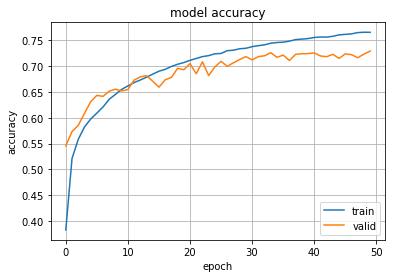

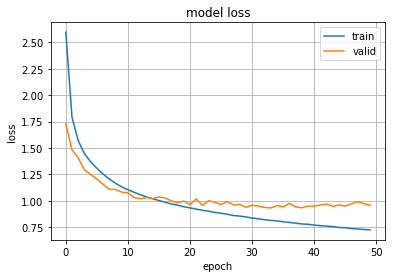

In [19]:
fileDumpHistoryBase = "./filesFolds-LSTMbidirectional5d/history/0/historyCatSede12-"
numTrainings = 4

histories = []
for i in range(numTrainings):
    histories.append(pickle.load(open(fileDumpHistoryBase+str(i)+".p", 'rb')))

allAcc = []
allValAcc = []
allLoss = []
allValLoss = []
for history in histories:
    allAcc += history['acc']
    allValAcc += history['val_acc']
    allLoss += history['loss']
    allValLoss += history['val_loss']
    print(len(allAcc))
                     
# summarize history for accuracy
plt.plot(allAcc)
plt.plot(allValAcc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(allLoss)
plt.plot(allValLoss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.grid()
plt.show()

In [17]:
fileEvaluation = "./filesFolds-LSTMbidirectional5d/output/0/evaluation.p"
tasks = ['sede12']

metrics = pickle.load(open(fileEvaluation, 'rb'))
table = [["task", "average", "MAPs", "MAPc", "accur.", "kappa", "prec.", "recall", "f1score"]]
na = ' '
for task in tasks:
    table.append([" ", " ", " ", " ", " ", " ", " ", " "])
    table.append([task, na, "{:.3f}".format(metrics[task]['MAPs']), "{:.3f}".format(metrics[task]['MAPc']), "{:.3f}".format(metrics[task]['accuracy']), "{:.3f}".format(metrics[task]['kappa']), na, na, na])
    for avg in ['micro', 'macro', 'weighted']:
        table.append([task, avg, na, na, na, na, "{:.3f}".format(metrics[task]['precision'][avg]), "{:.3f}".format(metrics[task]['recall'][avg]), "{:.3f}".format(metrics[task]['f1score'][avg])])
        
print(tabulate(table))

------  --------  -----  -----  ------  -----  -----  ------  -------
task    average   MAPs   MAPc   accur.  kappa  prec.  recall  f1score

sede12            0.824  0.455  0.734   0.720
sede12  micro                                  0.734  0.734   0.734
sede12  macro                                  0.403  0.388   0.377
sede12  weighted                               0.712  0.734   0.716
------  --------  -----  -----  ------  -----  -----  ------  -------


In [3]:
fileEvaluation = "./filesFolds-SVMbigrams/output/0/evaluation.p"
tasks = ['sede12']

metrics = pickle.load(open(fileEvaluation, 'rb'))
table = [["task", "average", "MAPs", "MAPc", "accur.", "kappa", "prec.", "recall", "f1score"]]
na = ' '
for task in tasks:
    table.append([" ", " ", " ", " ", " ", " ", " ", " "])
    table.append([task, na, "{:.3f}".format(metrics[task]['MAPs']), "{:.3f}".format(metrics[task]['MAPc']), "{:.3f}".format(metrics[task]['accuracy']), "{:.3f}".format(metrics[task]['kappa']), na, na, na])
    for avg in ['micro', 'macro', 'weighted']:
        table.append([task, avg, na, na, na, na, "{:.3f}".format(metrics[task]['precision'][avg]), "{:.3f}".format(metrics[task]['recall'][avg]), "{:.3f}".format(metrics[task]['f1score'][avg])])
        
print(tabulate(table))

------  --------  -----  -----  ------  -----  -----  ------  -------
task    average   MAPs   MAPc   accur.  kappa  prec.  recall  f1score

sede12            0.788  0.466  0.700   0.684
sede12  micro                                  0.700  0.700   0.700
sede12  macro                                  0.442  0.388   0.395
sede12  weighted                               0.688  0.700   0.685
------  --------  -----  -----  ------  -----  -----  ------  -------
